<a href="https://colab.research.google.com/github/Nlamje45/AI-Projects/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [4]:
#connecting colab with google drive for importing data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#importing all necessary libraries for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#reading and storing data with pandas
d=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Online Retail.xlsx")
d.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# dataset info
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
#checking for null values
d.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Dropping Null values present in the dataset

In [9]:
#dropping all the null values
d.dropna(inplace=True)

In [10]:
#checking number of records
d.shape

(406829, 8)

It is mentioned in the problem statement that column InvoiceNo which starts with 'c' indicates cancellation which is redundant data so we must drop this data.

In [11]:
#converting invoice number to string for getting cancelled orders
d['InvoiceNo']=d['InvoiceNo'].astype('str')

In [12]:
#displaying all the cancelled orders
d[d['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Their are 8905 cancelled orders

In [13]:
#storing all not cancelled order
d=d[~d['InvoiceNo'].str.contains("C")]

In [14]:
#number of data present
d.shape

(397924, 8)

In [15]:
# statistical info
d.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


##**Exploratory Data Analysis**

In [16]:
#exploring most sold item name
disdat=d['Description'].value_counts().reset_index()
disdat.rename(columns={'index':'Item_Name'},inplace=True)
disdat.rename(columns={'Description':'Count'},inplace=True)
disdat.head()

,Item_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [17]:
#exploring least sold item name
disdat.tail()

,Item_Name,Count
3872,PINK/WHITE GLASS DEMI CHOKER,1
3873,VINTAGE BLUE TINSEL REEL,1
3874,PINK ACRYLIC JEWEL SNOWFLAKE,1
3875,MINT DINER CLOCK,1
3876,UNION JACK HOT WATER BOTTLE,1


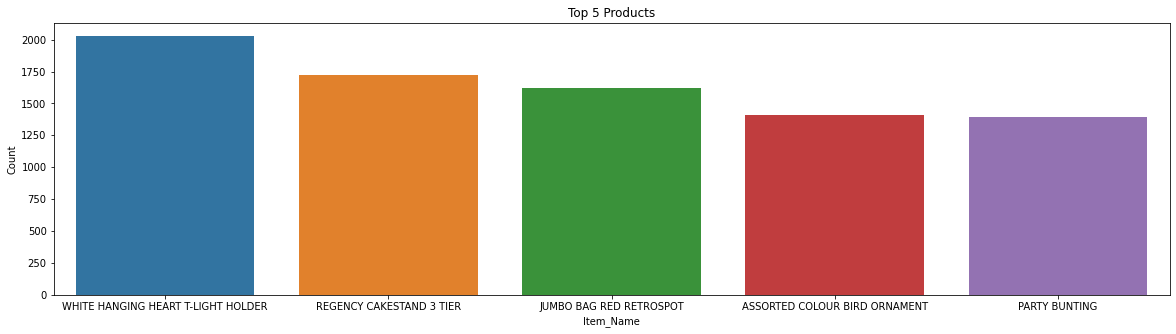

In [18]:
#visualizing top 5 products
plt.figure(figsize=(20,5))
plt.title('Top 5 Products')
sns.barplot(x='Item_Name',y='Count',data=disdat[:5])

**Top 5 maximum Sold products are**


1.   	WHITE HANGING HEART T-LIGHT HOLDER
2.   REGENCY CAKESTAND 3 TIER
3.JUMBO BAG RED RETROSPOT
4.ASSORTED COLOUR BIRD ORNAMENT
5.PARTY BUNTING



**Bottom 5 least Sold products are**


1.   	CAT WITH SUNGLASSES BLANK CARD
2.   PINK CRYSTAL GUITAR PHONE CHARM
3.FOOD COVER WITH BEADS , SET 2 SIZES
4.GLASS BEAD HOOP EARRINGS BLACK
5.	ROSE PENDANT TRIPLE SHELL NECKLACE

In [19]:
#products sold according to their quantity
k=d.groupby('Description')['Quantity'].sum().sort_values(ascending=False)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


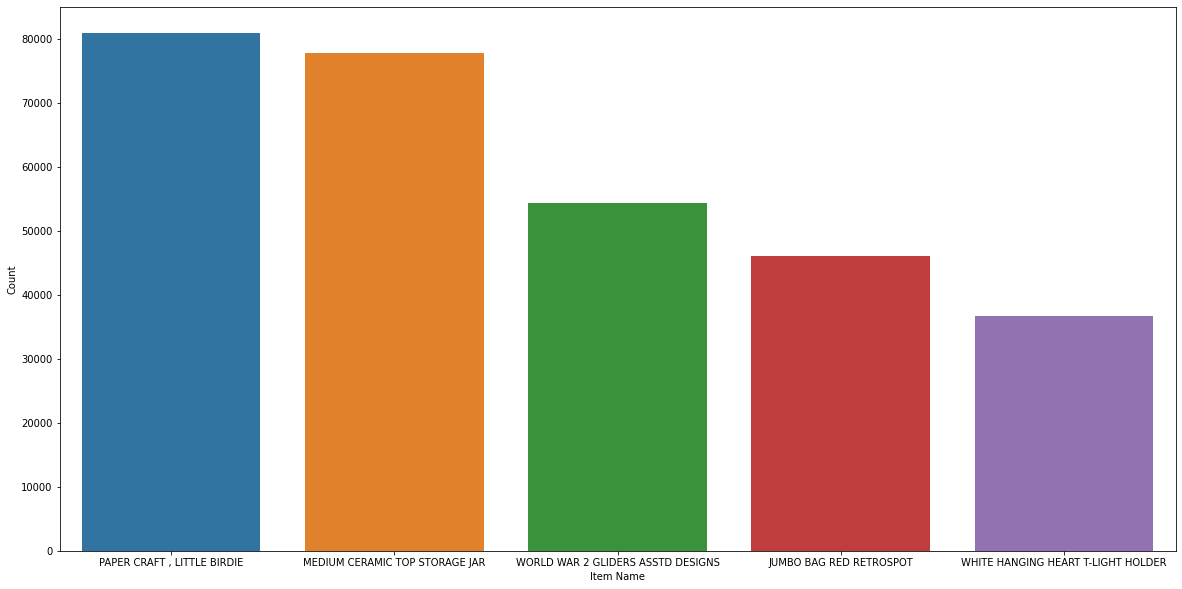

In [20]:
#Top 5products sold according to their quantity
k=d.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
t=k[:5]
x=t.index
y=t
plt.figure(figsize=(20,10))
ax=sns.barplot(x,y)
ax.set(xlabel='Item Name', ylabel="Count")
plt.show()
#print(t)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


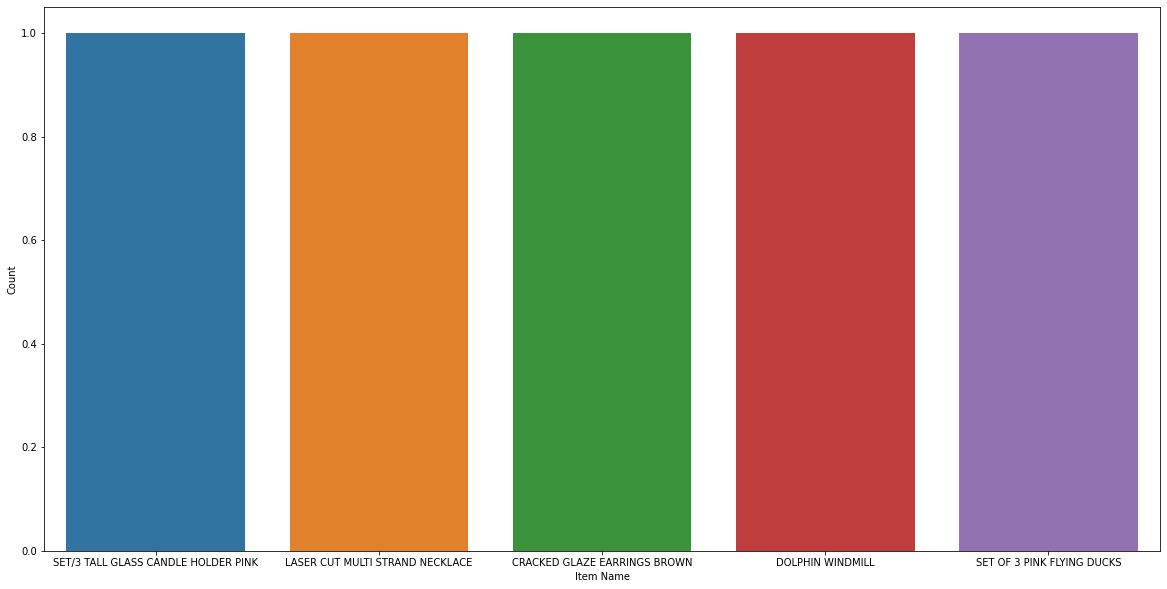

Description
SET/3 TALL GLASS CANDLE HOLDER PINK    1
LASER CUT MULTI STRAND NECKLACE        1
CRACKED GLAZE EARRINGS BROWN           1
DOLPHIN WINDMILL                       1
SET OF 3 PINK FLYING DUCKS             1
Name: Quantity, dtype: int64


In [21]:
#Bottom 5products sold according to their quantity
k=d.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
t=k[-5:]
x=t.index
y=t
plt.figure(figsize=(20,10))
ax=sns.barplot(x,y)
ax.set(xlabel='Item Name', ylabel="Count")
plt.show()
print(t)

**Top 5 maximum Sold products according to quantity are**


1.   	PAPER CRAFT , LITTLE BIRDIE       
2. MEDIUM CERAMIC TOP STORAGE JAR   
3.WORLD WAR 2 GLIDERS ASSTD DESIGNS    
4.JUMBO BAG RED RETROSPOT          
5.WHITE HANGING HEART T-LIGHT HOLDER 

**Bottom 5 least Sold products according to quantity are**


1.   	SET/3 TALL GLASS CANDLE HOLDER PINK    
2.LASER CUT MULTI STRAND NECKLACE        
3.CRACKED GLAZE EARRINGS BROWN           
4.DOLPHIN WINDMILL                       
5.SET OF 3 PINK FLYING DUCKS  

In [22]:
d.groupby('Description')['StockCode'].nunique()

Description
 4 PURPLE FLOCK DINNER CANDLES      1
 50'S CHRISTMAS GIFT BAG LARGE      1
 DOLLY GIRL BEAKER                  1
 I LOVE LONDON MINI BACKPACK        1
 I LOVE LONDON MINI RUCKSACK        1
                                   ..
ZINC T-LIGHT HOLDER STARS SMALL     1
ZINC TOP  2 DOOR WOODEN SHELF       1
ZINC WILLIE WINKIE  CANDLE STICK    1
ZINC WIRE KITCHEN ORGANISER         1
ZINC WIRE SWEETHEART LETTER TRAY    1
Name: StockCode, Length: 3877, dtype: int64

In [23]:
condat=d['Country'].value_counts().reset_index()
condat.rename(columns={'index':'Countries'},inplace=True)
condat.rename(columns={'Country':'Count'},inplace=True)
print(condat.head())
print("--"*30)
print(condat.tail())

        Countries   Count
0  United Kingdom  354345
1         Germany    9042
2          France    8342
3            EIRE    7238
4           Spain    2485
------------------------------------------------------------
         Countries  Count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     25
35         Bahrain     17
36    Saudi Arabia      9


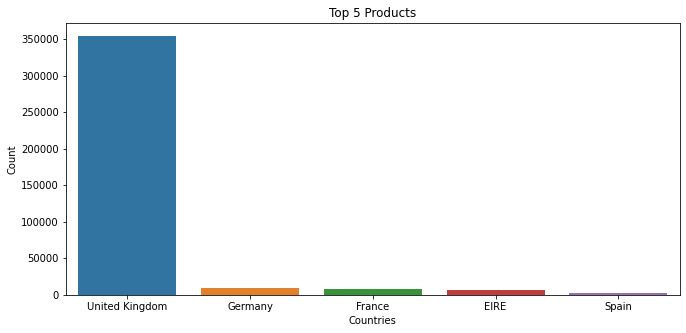

In [24]:
plt.figure(figsize=(11,5))
plt.title('Top 5 Products')
sns.barplot(x='Countries',y='Count',data=condat[:5])

The Customers are mostly from United Kingdom

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


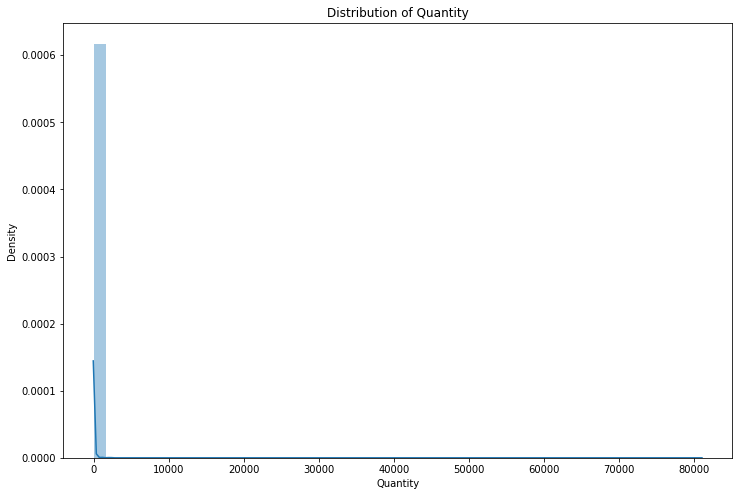

In [25]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Quantity')
sns.distplot(d['Quantity'])

Using Log transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


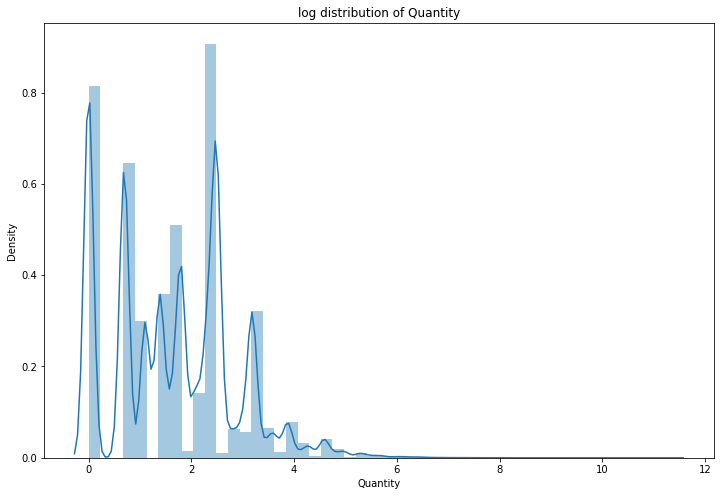

In [26]:
plt.figure(figsize=(12,8))
plt.title('log distribution of Quantity')
sns.distplot(np.log(d['Quantity']))

Distribution for Unit price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


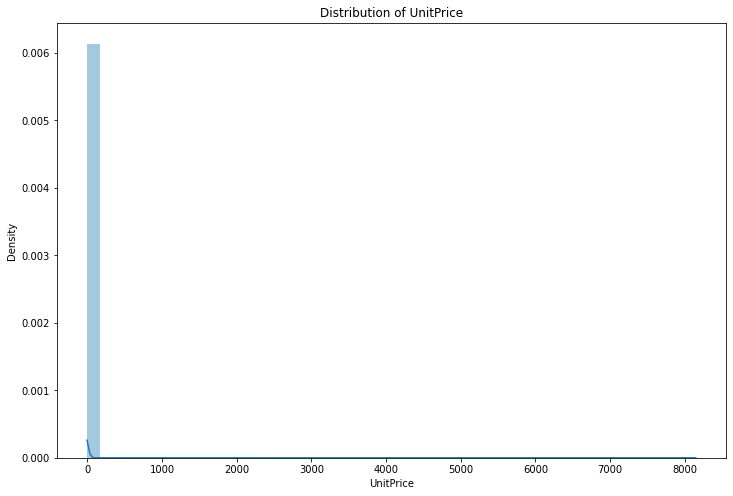

In [27]:
plt.figure(figsize=(12,8))
plt.title('Distribution of UnitPrice')
sns.distplot(d['UnitPrice'])

For any succesfull purchase the unit price should be greater than zero

In [28]:
#dropping if any unit price less than zero or free
d=d[d['UnitPrice']>0]

##**Feature Engineering**

Converting invoice data into date time stamp

In [29]:
#Converting invoice data into date time stamp
d["InvoiceDate"] = pd.to_datetime(d["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
#seperating all the day month and year into different columns
d['Day']=d['InvoiceDate'].dt.day_name()
d["year"] = d["InvoiceDate"].apply(lambda x: x.year)
d["month_num"] = d["InvoiceDate"].apply(lambda x: x.month)
d["day_num"] = d["InvoiceDate"].apply(lambda x: x.day)
d['Month']=d['InvoiceDate'].dt.month_name()
d["hour"] = d["InvoiceDate"].apply(lambda x: x.hour)
d["minute"] = d["InvoiceDate"].apply(lambda x: x.minute)

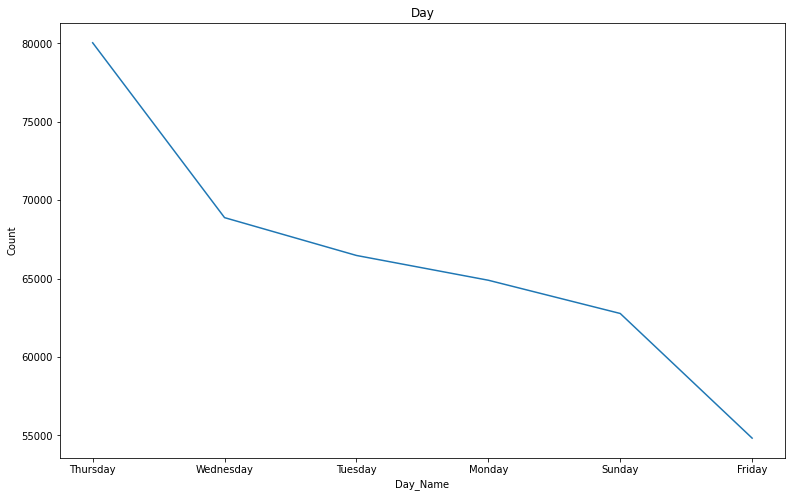

In [31]:
#visualizing according to day
dayd=d['Day'].value_counts().reset_index()
dayd.rename(columns={'index': 'Day_Name'}, inplace=True)
dayd.rename(columns={'Day': 'Count'}, inplace=True)
plt.figure(figsize=(13,8))
plt.title('Day')
sns.lineplot(x='Day_Name',y='Count',data=dayd)


It is clear that most Sales are on Thrusday>Wednesday>Tuesday respectively

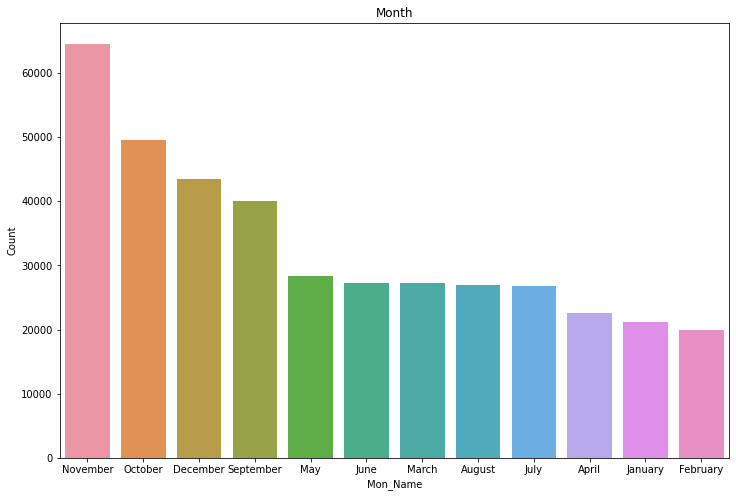

In [32]:
#visualizing according to month
mond=d['Month'].value_counts().reset_index()
mond.rename(columns={'index': 'Mon_Name'}, inplace=True)
mond.rename(columns={'Month': 'Count'}, inplace=True)
plt.figure(figsize=(12,8))
plt.title('Month')
sns.barplot(x='Mon_Name',y='Count',data=mond)


It is clear that most of the sales are in Year end November> October> December

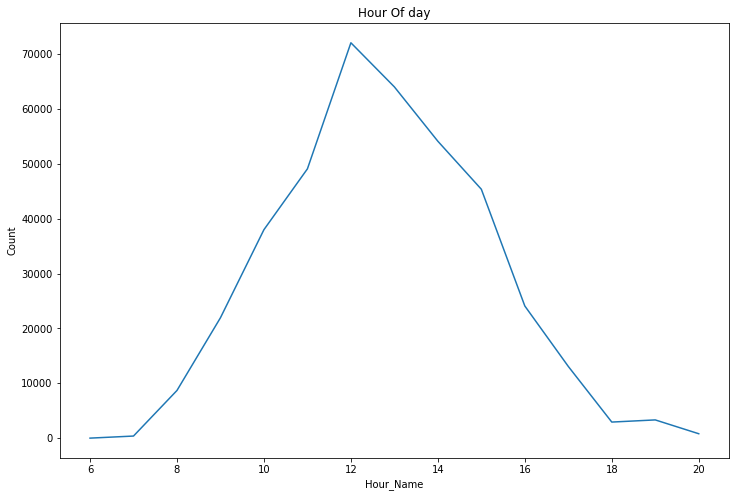

In [33]:
#visualizing according to hour
hord=d['hour'].value_counts().reset_index()
hord.rename(columns={'index': 'Hour_Name'}, inplace=True)
hord.rename(columns={'hour': 'Count'}, inplace=True)
plt.figure(figsize=(12,8))
plt.title('Hour Of day')
sns.lineplot(x='Hour_Name',y='Count',data=hord)


It is clear that most of the sales are in time between 10am to 4pm

*   It is clear that most of the sales are in time between 10am to 4pm

*  maximum sales at 12pm



##Data Modeling

Creating RFM model

In [34]:
#for creating monetary value
d['TotalAmount']=d['Quantity']*d['UnitPrice']

In [35]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_d = d.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_d['InvoiceDate'] = rfm_d['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_d.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_d.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [36]:
#Descriptive Statistics (Recency)
rfm_d.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


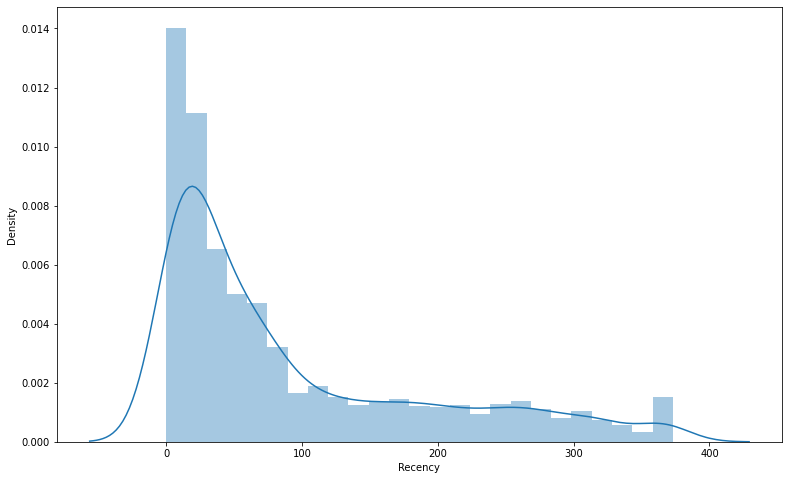

In [37]:
#Recency distribution plot
import seaborn as sns
x = rfm_d['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

Most of the orders are recent

In [38]:
#Descriptive Statistics (Frequency)
rfm_d.Frequency.describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


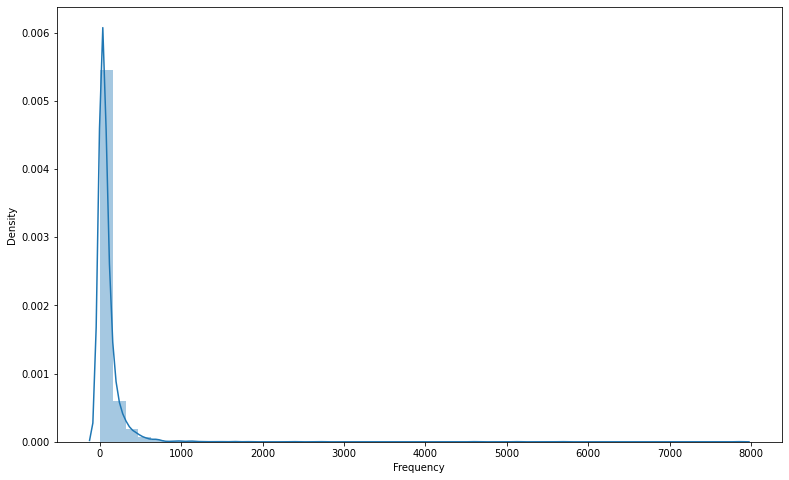

In [39]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm_d['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

Most of the customers are frequent buyers

In [40]:
#Descriptive Statistics (Monetary)
rfm_d.Monetary.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


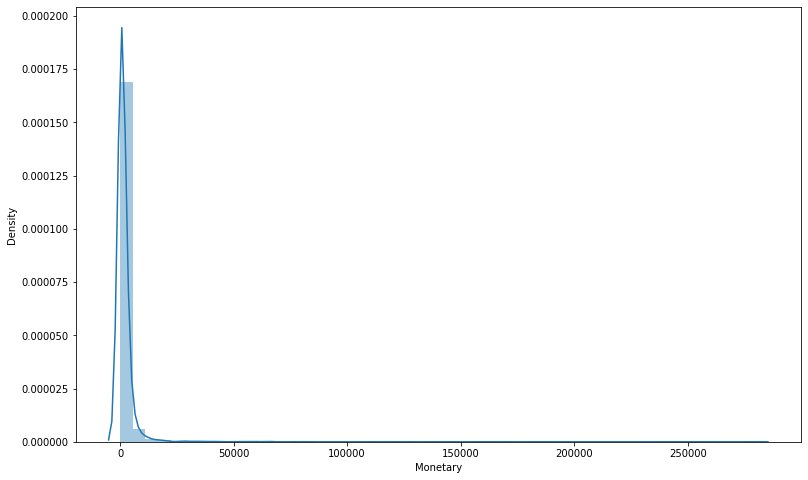

In [41]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm_d['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [42]:
#Split into four segments using quantiles
quantiles = rfm_d.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75}}

In [43]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

##Calculating RFM Scores

In [44]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_d['R'] = rfm_d['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_d['F'] = rfm_d['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_d['M'] = rfm_d['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_d.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [45]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_d['RFMGroup'] = rfm_d.R.map(str) + rfm_d.F.map(str) + rfm_d.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_d['RFMScore'] = rfm_d[['R', 'F', 'M']].sum(axis = 1)
rfm_d.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [46]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_d['Recency'] = [handle_neg_n_zero(x) for x in rfm_d.Recency]
rfm_d['Monetary'] = [handle_neg_n_zero(x) for x in rfm_d.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_d[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


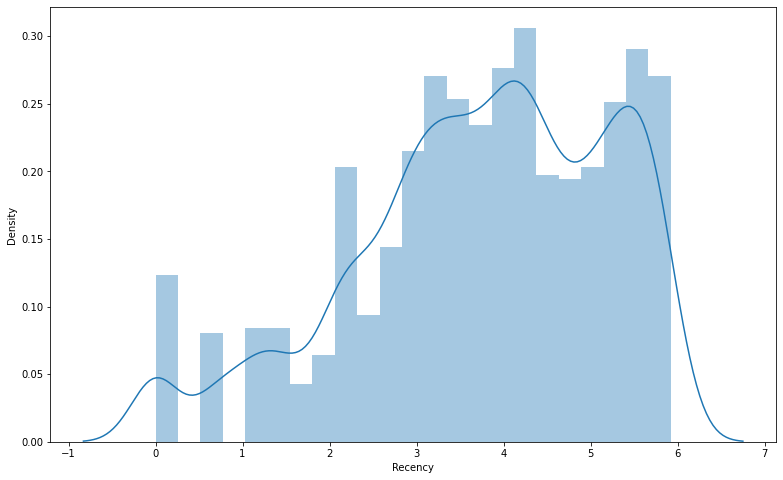

In [47]:

#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


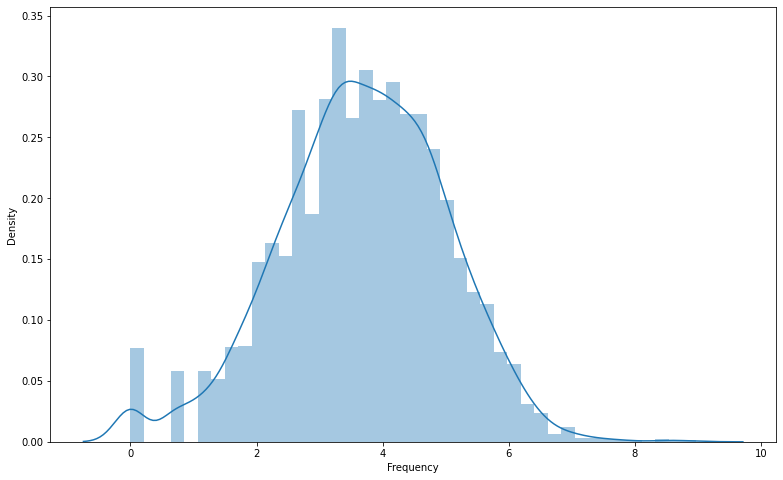

In [48]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


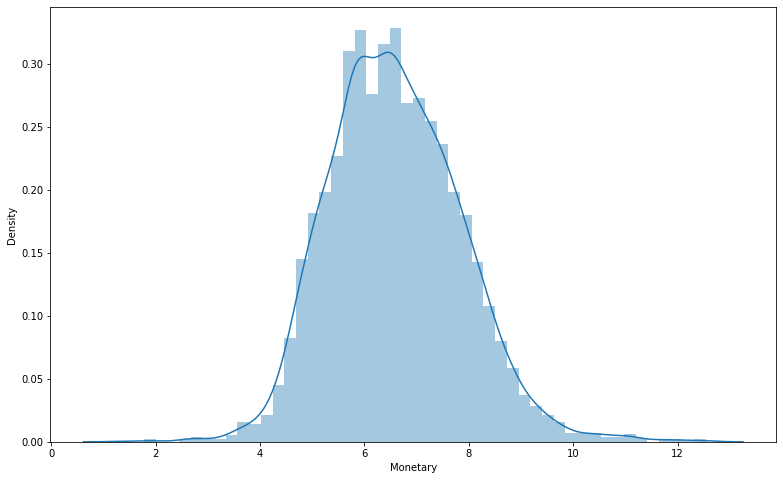

In [49]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [50]:
from sklearn import preprocessing
rfm_d['Recency_log'] = rfm_d['Recency'].apply(np.log)
rfm_d['Frequency_log'] = rfm_d['Frequency'].apply(np.log)
rfm_d['Monetary_log'] = rfm_d['Monetary'].apply(np.log)

##Modeling for Recency and Monetary

K Means by silhoutte score

In [51]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_d[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
silscore=[]
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silscore.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4212698826557825
For n_clusters = 3, silhouette score is 0.34368445471351683
For n_clusters = 4, silhouette score is 0.3646546625118266
For n_clusters = 5, silhouette score is 0.33537246676448607
For n_clusters = 6, silhouette score is 0.34451227323419537
For n_clusters = 7, silhouette score is 0.3458686598483909
For n_clusters = 8, silhouette score is 0.33895439460880056
For n_clusters = 9, silhouette score is 0.34607064054469844
For n_clusters = 10, silhouette score is 0.34847413295896656
For n_clusters = 11, silhouette score is 0.3385762213030727
For n_clusters = 12, silhouette score is 0.3438561831769994
For n_clusters = 13, silhouette score is 0.34099598201743503
For n_clusters = 14, silhouette score is 0.347365196372706
For n_clusters = 15, silhouette score is 0.33496034762511545


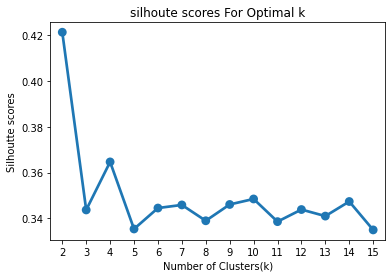

In [52]:
sns.pointplot(x = range_n_clusters, y = silscore)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhoutte scores')
plt.title('silhoute scores For Optimal k')
plt.show()

It depends on how much types of clusters do we require for business purpose from the graph Number of clusters=2 is best followed by Number of clusters =4

Kmeans by elbow method

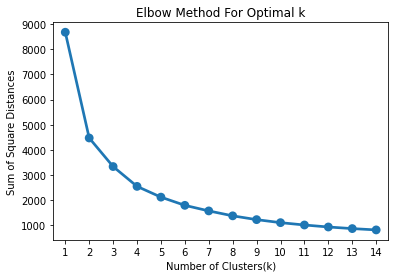

In [53]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_d[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

By elbow method also Number of clusters ideally must be 2 but depends on business requrements

In [54]:
#fitting model for k=2
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

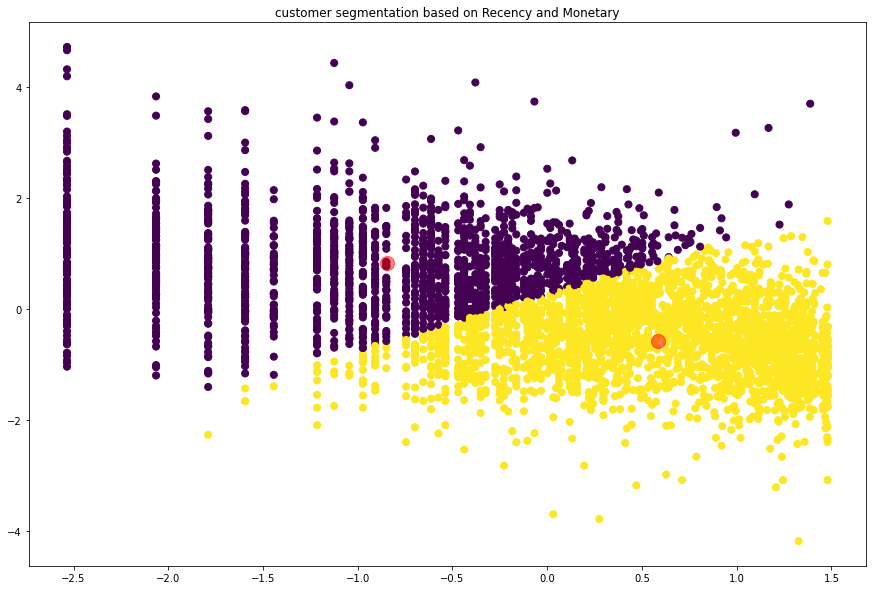

In [55]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50,)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

DBSCAN for Recency and Monetary

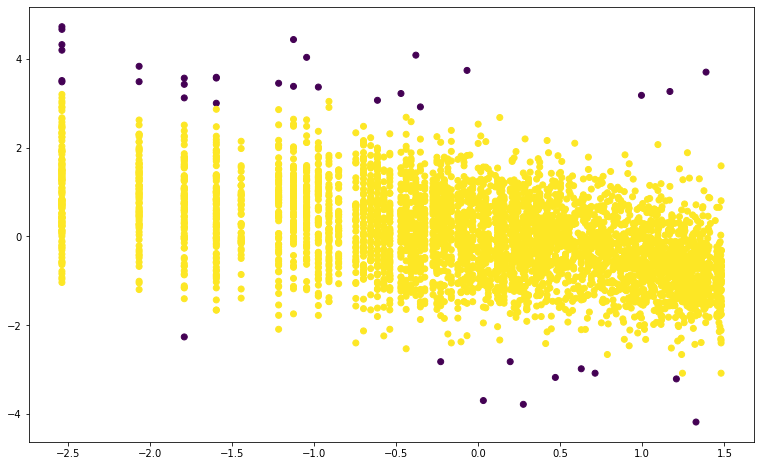

In [56]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

##Modeling for Frequency and Monetary

In [57]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_d[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
silscore=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silscore.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.478535709506603
For n_clusters = 3, silhouette score is 0.40761213900720406
For n_clusters = 4, silhouette score is 0.37156283167006565
For n_clusters = 5, silhouette score is 0.34573335393419585
For n_clusters = 6, silhouette score is 0.35980550625274477
For n_clusters = 7, silhouette score is 0.3422763453081607
For n_clusters = 8, silhouette score is 0.35229313036423116
For n_clusters = 9, silhouette score is 0.3383741807653794
For n_clusters = 10, silhouette score is 0.3606636350810187
For n_clusters = 11, silhouette score is 0.36917057531713304
For n_clusters = 12, silhouette score is 0.35362878355052746
For n_clusters = 13, silhouette score is 0.36083829108337023
For n_clusters = 14, silhouette score is 0.35641462584686323
For n_clusters = 15, silhouette score is 0.36370211604717434


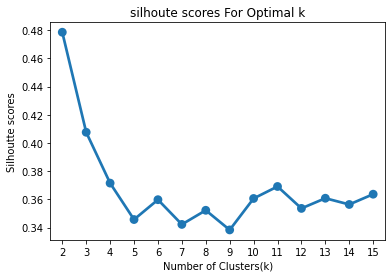

In [58]:
sns.pointplot(x = range_n_clusters, y = silscore)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhoutte scores')
plt.title('silhoute scores For Optimal k')
plt.show()

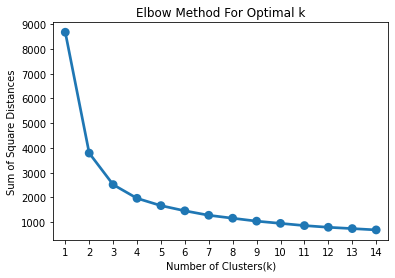

In [59]:
features_rec_mon=['Frequency_log','Monetary_log']
X_features_rec_mon=rfm_d[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [60]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

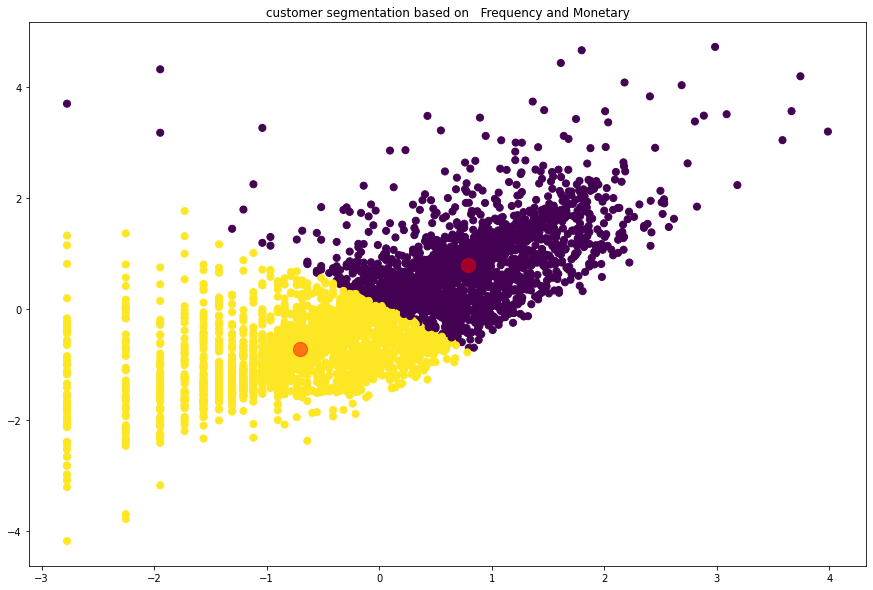

In [61]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

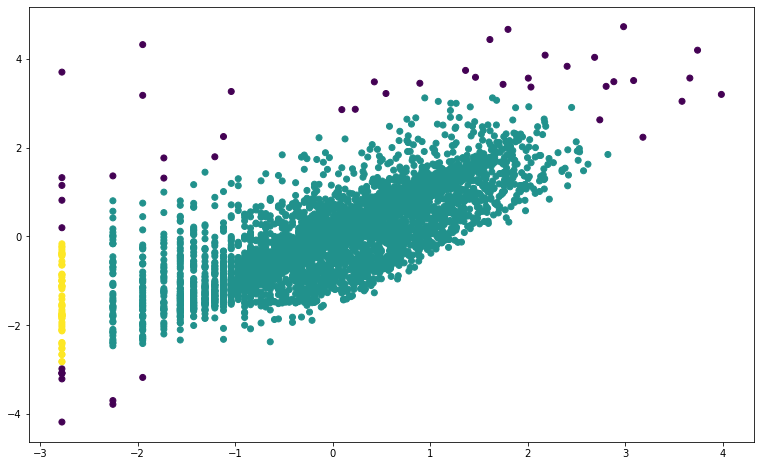

In [62]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

##Modeling for Recency and Frequency

In [63]:
features_fre_mon=['Recency_log','Frequency_log']
X_features_fre_mon=rfm_d[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
silscore=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silscore.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41992111630742585
For n_clusters = 3, silhouette score is 0.34339375299838504
For n_clusters = 4, silhouette score is 0.3493735968874868
For n_clusters = 5, silhouette score is 0.34748187539607556
For n_clusters = 6, silhouette score is 0.33551171050788126
For n_clusters = 7, silhouette score is 0.34731862119408136
For n_clusters = 8, silhouette score is 0.34834905584213416
For n_clusters = 9, silhouette score is 0.34267788754377687
For n_clusters = 10, silhouette score is 0.3427259799419309
For n_clusters = 11, silhouette score is 0.34629457991417506
For n_clusters = 12, silhouette score is 0.34501434678990034
For n_clusters = 13, silhouette score is 0.3510029068980826
For n_clusters = 14, silhouette score is 0.3519596204329219
For n_clusters = 15, silhouette score is 0.3541434984289976


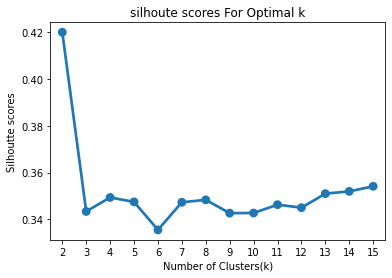

In [64]:
sns.pointplot(x = range_n_clusters, y = silscore)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhoutte scores')
plt.title('silhoute scores For Optimal k')
plt.show()

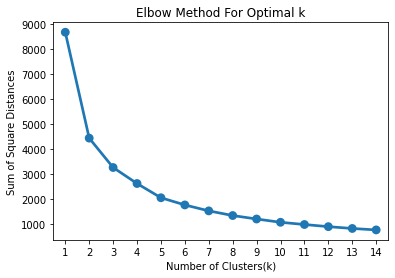

In [65]:
features_rec_mon=['Recency_log','Frequency_log']
X_features_rec_mon=rfm_d[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [66]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

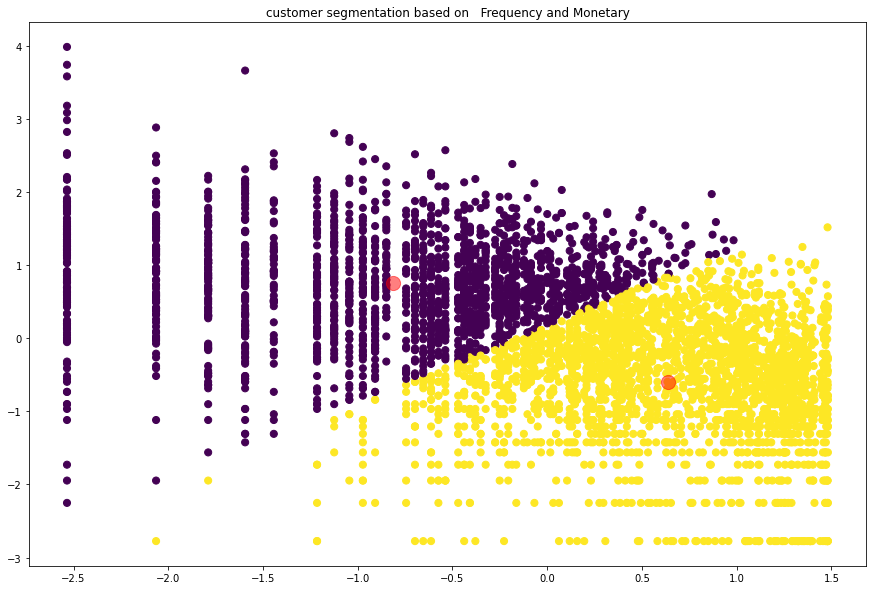

In [67]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

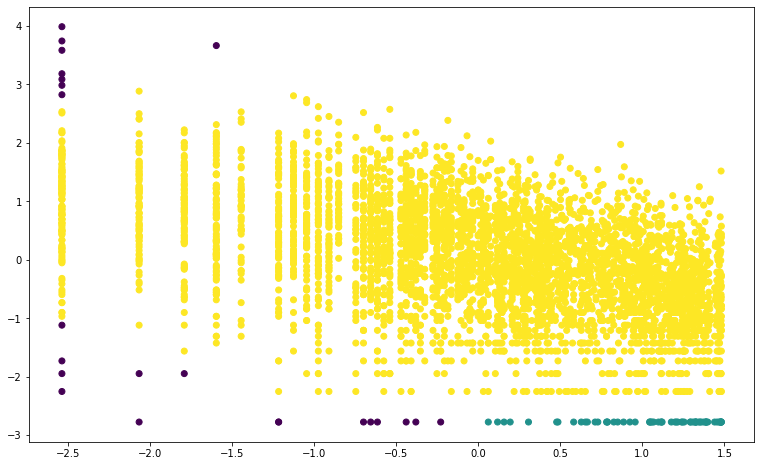

In [68]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

##Modeling for Recency, Monetary Value and Frequency

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


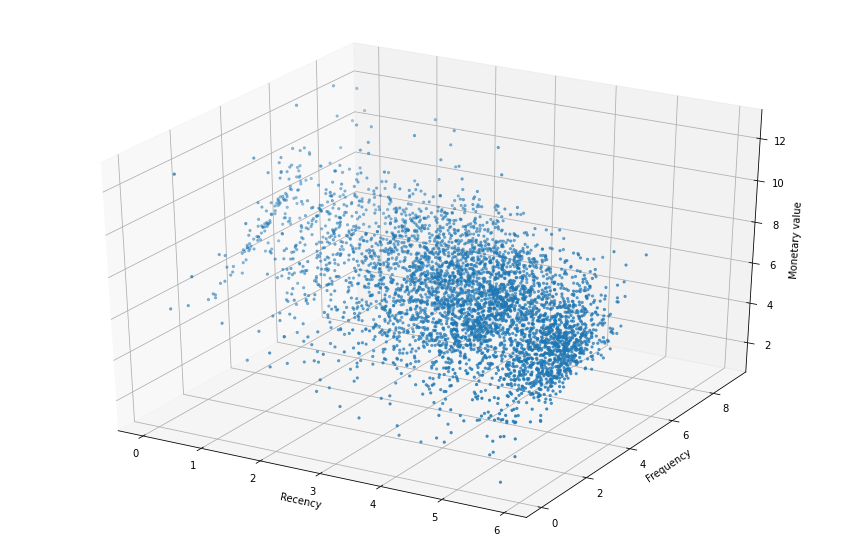

In [72]:
#visualizing all the three
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15,10))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=rfm_d.Recency_log
ys=rfm_d.Frequency_log
zs=rfm_d.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

Applying Silhouette Method on Recency ,Frequency and Monetary

In [74]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_d[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

In [77]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
silscor=[]

for n_clusters in range_n_clusters:
    

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silscor.append(silhouette_avg)

    

For n_clusters = 2 The average silhouette_score is : 0.3956478042246982
For n_clusters = 3 The average silhouette_score is : 0.3049826724447913
For n_clusters = 4 The average silhouette_score is : 0.30279724233096916
For n_clusters = 5 The average silhouette_score is : 0.2785519277480847
For n_clusters = 6 The average silhouette_score is : 0.2789560652501828
For n_clusters = 7 The average silhouette_score is : 0.2613208163968789
For n_clusters = 8 The average silhouette_score is : 0.2640918249728342
For n_clusters = 9 The average silhouette_score is : 0.2585642595481418
For n_clusters = 10 The average silhouette_score is : 0.2644733794304285
For n_clusters = 11 The average silhouette_score is : 0.2592423011915937
For n_clusters = 12 The average silhouette_score is : 0.26503813251658404
For n_clusters = 13 The average silhouette_score is : 0.2621555416679574
For n_clusters = 14 The average silhouette_score is : 0.26140947155997746
For n_clusters = 15 The average silhouette_score is : 0.

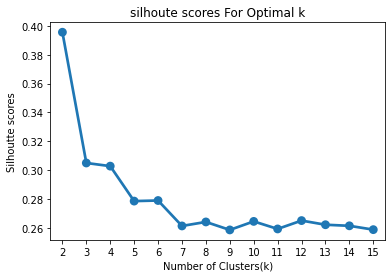

In [78]:
sns.pointplot(x = range_n_clusters, y = silscor)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhoutte scores')
plt.title('silhoute scores For Optimal k')
plt.show()

In [79]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

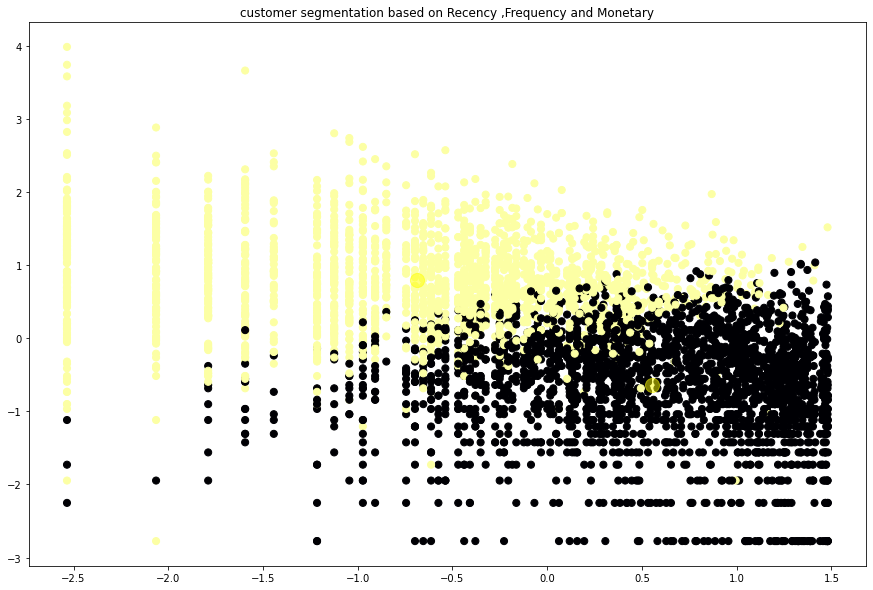

In [85]:
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='inferno')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)

Applying Elbow Method on Recency ,Frequency and Monetary

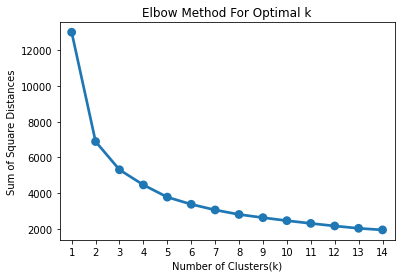

In [86]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [88]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_d['Cluster'] = KMean_clust.labels_
rfm_d.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,5.783825,0.000000,11.253942,0
12347.0,2,182,4310.00,1,1,1,111,3,0.693147,5.204007,8.368693,1
12348.0,75,31,1797.24,3,3,1,331,7,4.317488,3.433987,7.494007,0
12349.0,18,73,1757.55,2,2,1,221,5,2.890372,4.290459,7.471676,1
12350.0,310,17,334.40,4,4,3,443,11,5.736572,2.833213,5.812338,0
12352.0,36,85,2506.04,2,2,1,221,5,3.583519,4.442651,7.826459,1
12353.0,204,4,89.00,4,4,4,444,12,5.318120,1.386294,4.488636,0
12354.0,232,58,1079.40,4,2,2,422,8,5.446737,4.060443,6.984161,0
12355.0,214,13,459.40,4,4,3,443,11,5.365976,2.564949,6.129921,0


Applying DBSCAN to Recency ,Frequency and Monetary

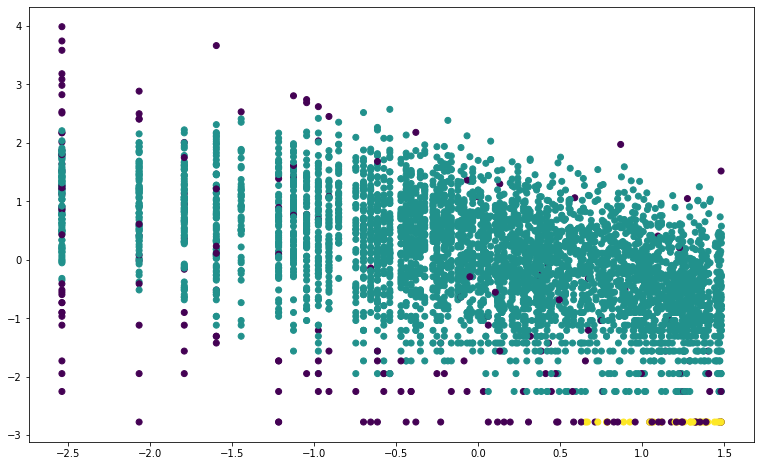

In [89]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)